In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#! pip install pillow-avif-plugin
! pip install pillow


In [11]:
from PIL import Image
import pillow_avif

img = Image.open("C:/Users/anjan/SNU/6th Sem/IVP/IVP Lab - Model Questions/IVP Lab - Model Questions/SET-9/Art.avif")
img.save('Art.jpg')

ModuleNotFoundError: No module named 'pillow_avif'

In [3]:
img = cv2.imread('Art.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


#### CONVERT TO GRAYSCALE

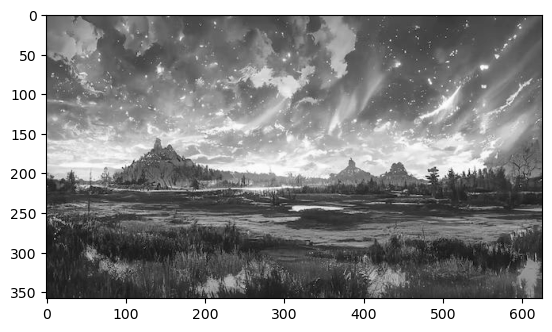

In [4]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,cmap='gray')

### GLOBAL THRESHOLDING

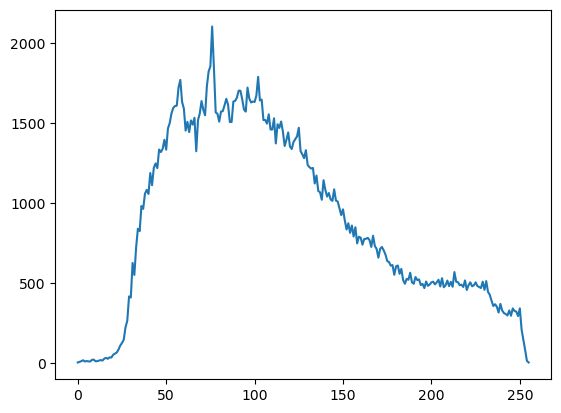

In [5]:
histr = cv2.calcHist([gray_img],[0],None,[256],[0,256])  
plt.plot(histr) 
plt.show() 

In [6]:
global_threshold_1 = 100
global_threshold_2 = 150
global_threshold_3 = 85

In [12]:
threshold = [global_threshold_1,global_threshold_2,global_threshold_3]

In [7]:
gray_img.shape

(358, 626)

In [8]:
gray_img_true = gray_img.copy()

In [9]:
def global_threshold_segmentation(img,value):
    img_copy = img.copy()
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            if (img_copy[i][j]>value):
                img_copy[i][j] = 255
            else:
                img_copy[i][j] = 0
    return img_copy

In [10]:
seg_img_1 = global_threshold_segmentation(gray_img,global_threshold_1)
seg_img_2 = global_threshold_segmentation(gray_img,global_threshold_2)
seg_img_3 = global_threshold_segmentation(gray_img,global_threshold_3)

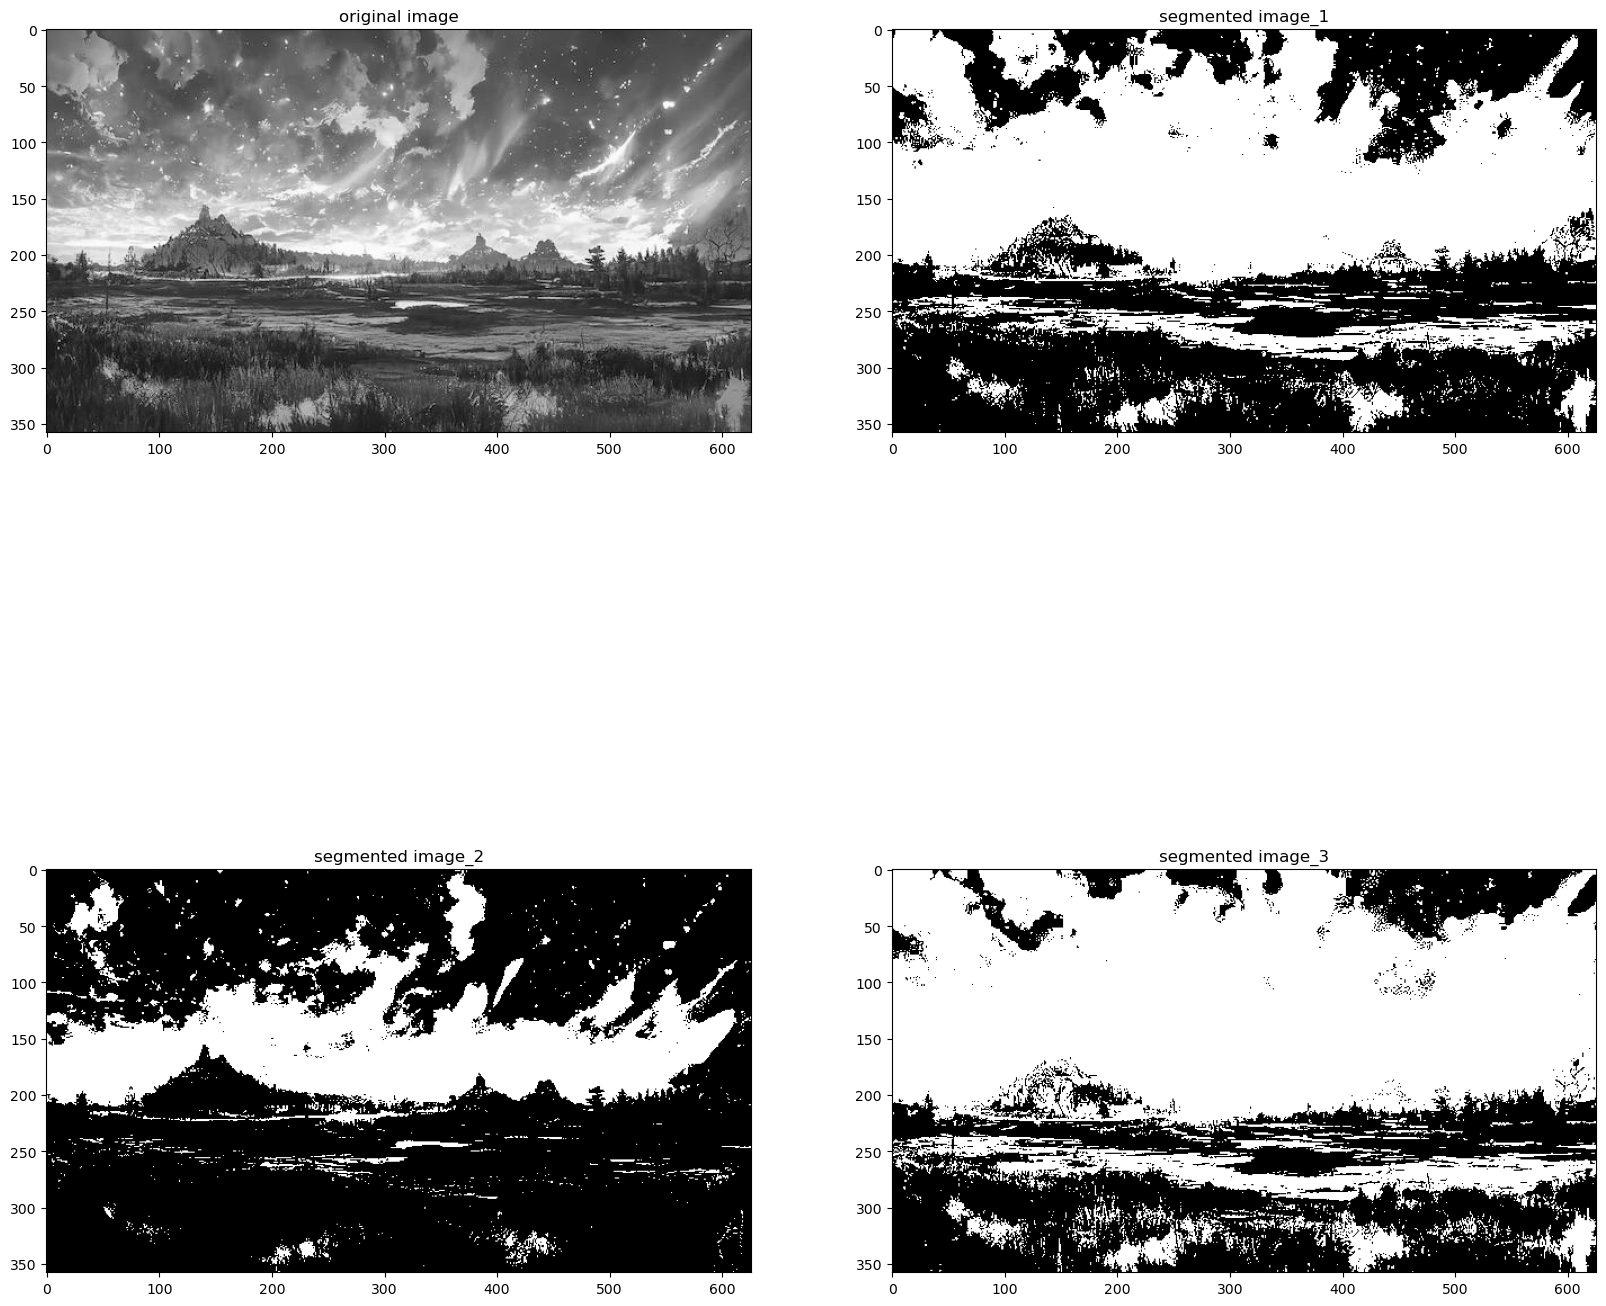

In [14]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(gray_img_true,cmap='gray')

plt.subplot(2,2,2)
plt.title('segmented image_1')
plt.imshow(seg_img_1,cmap='gray')

plt.subplot(2,2,3)
plt.title('segmented image_2')
plt.imshow(seg_img_2,cmap='gray')

plt.subplot(2,2,4)
plt.title('segmented image_3')
plt.imshow(seg_img_3,cmap='gray')

### APAPTIVE THRESHOLDING

In [33]:
thresh1 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 10) 
  
thresh2 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 10) 

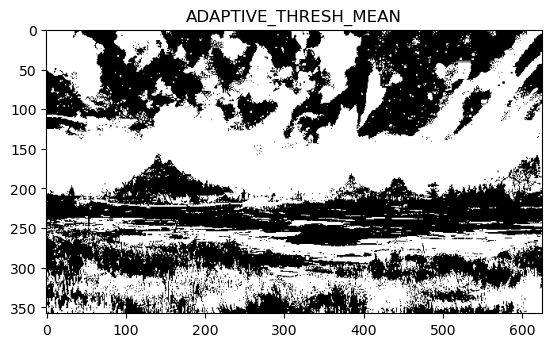

In [34]:
plt.title('ADAPTIVE_THRESH_MEAN')
plt.imshow(thresh1,cmap='gray')

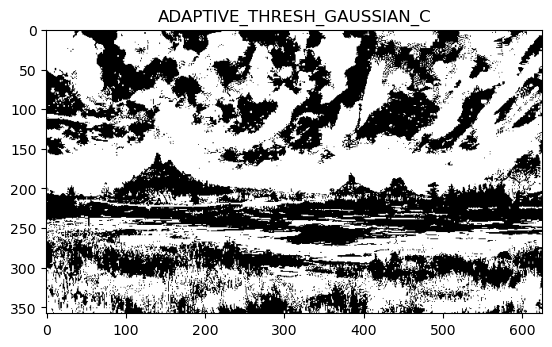

In [35]:
plt.title('ADAPTIVE_THRESH_GAUSSIAN_C')
plt.imshow(thresh2,cmap='gray')

### K-MEANS CLUSTERING FOR COLOR IMAGE SEGMENTATION

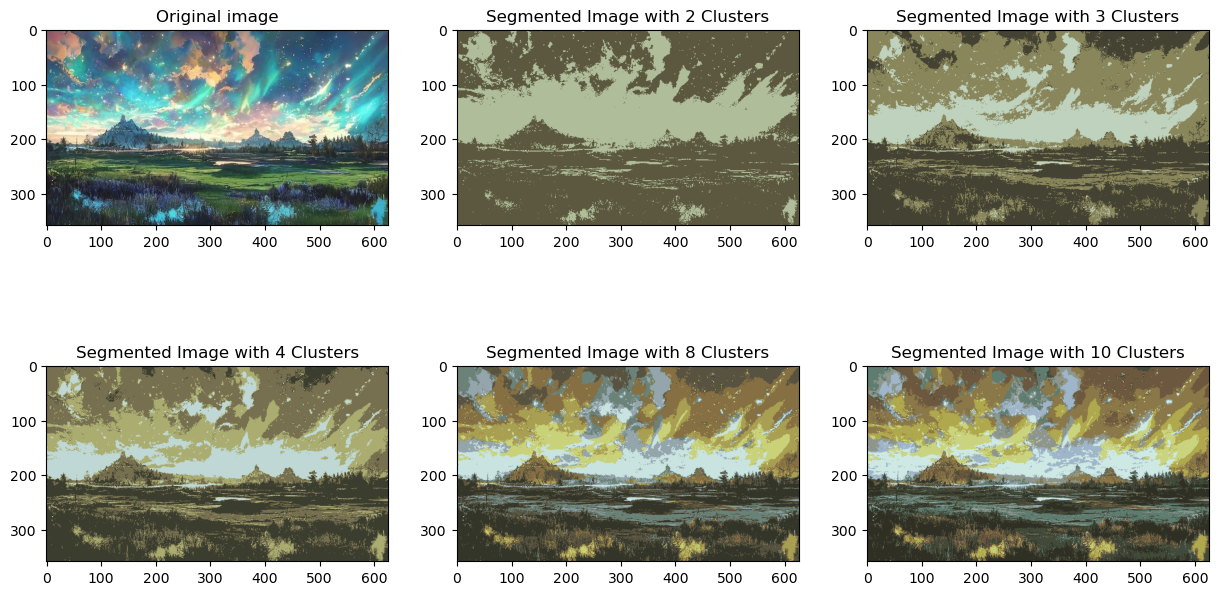

In [40]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
num_clusters_list = [2,3,4,8,10]
plt.figure(figsize=(15,8))

plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original image')


for i, num_clusters in enumerate(num_clusters_list):
    _, labels, centers = cv2.kmeans(pixel_values, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to 8-bit values
    centers = np.uint8(centers)

    # Map the labels to the centers
    segmented_image = centers[labels.flatten()]

    # Reshape back to the original image shape
    segmented_image = segmented_image.reshape(image.shape)

    # Plot the segmented image
    plt.subplot(2, 3, i+2)
    plt.imshow(segmented_image)
    plt.title('Segmented Image with {} Clusters'.format(num_clusters))

plt.show()


as the number of clusters increases, the level to which image segmentation occurs also increases.


FOR EXAMPLE: 

for number of cluster = 2, there is mostly only foreground and background separation.


for number of cluster = 8 , there is lot more detailed segmentation, the clouds and grasses of different colors are segmented distinctively